In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
palette = ['#56903A','#C56C39','#BAE5F9','#6F4930','#213A1B']
sns.set_palette(palette)

In [3]:
data =pd.read_csv('allnpdata.csv')
data.shape

/var/folders/r0/2fgtj8y934zddv46dgfbq1xw0000gn/T/ipykernel_37242/3019946645.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('allnpdata.csv')


(93328, 35)

In [4]:
data.sample(5)

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,NonRecreationVisitsTotal,RecreationHoursTotal,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal
28392,Fort Matanzas NM,FOMA,National Monument,Southeast,FL,2003,6,"83,349",0,"86,950",...,0,"958,799",0,0,0,0,0,0,0,0
29665,Fort Raleigh NHS,FORA,National Historic Site,Southeast,NC,2004,7,"68,680",112,"133,441",...,"1,344","443,234","1,344",0,0,0,0,0,0,0
7200,Bighorn Canyon NRA,BICA,National Recreation Area,Intermountain,MT,2011,1,"4,813",225,"16,341",...,"6,900","707,993","3,455",0,0,"2,844","6,129",305,0,0
45157,Isle Royale NP,ISRO,National Park,Midwest,MI,2014,1,11,6,11,...,166,"1,097,272","11,716","7,331",346,"5,758",0,"29,662",483,"1,671"
48657,Kenai Fjords NP,KEFJ,National Park,Alaska,AK,2007,9,"26,340",0,"82,416",...,0,"913,094",0,0,0,"1,460",0,195,0,0


In [5]:
num_attribs =['RecreationVisits', 'NonRecreationVisits', 'RecreationHours',
       'NonRecreationHours', 'ConcessionerLodging', 'ConcessionerCamping',
       'TentCampers', 'RVCampers', 'Backcountry',
       'NonRecreationOvernightStays', 'MiscellaneousOvernightStays', 'RecreationVisitsTotal',
       'NonRecreationVisitsTotal', 'RecreationHoursTotal',
       'NonRecreationHoursTotal', 'ConcessionerLodgingTotal',
       'ConcessionerCampingTotal', 'TentCampersTotal', 'RVCampersTotal',
       'BackcountryTotal', 'NonRecreationOvernightStaysTotal',
       'MiscellaneousOvernightStaysTotal']

for x in num_attribs:
    data[x]=data[x].apply(lambda x: str(x).replace(',',''))
    data[x]=pd.to_numeric(data[x])

In [6]:
data.describe()

,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,...,NonRecreationVisitsTotal,RecreationHoursTotal,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal
count,93328.00000,93328.000000,9.332800e+04,9.332800e+04,9.332800e+04,9.332800e+04,93328.000000,93328.000000,93328.000000,93328.000000,...,9.332800e+04,9.332800e+04,9.332800e+04,93328.000000,93328.000000,93328.000000,93328.000000,93328.000000,93328.000000,9.332800e+04
mean,2013.19140,6.500729,6.558803e+04,3.621221e+04,2.875552e+05,3.621221e+04,712.393890,284.449597,720.023444,504.736703,...,4.345464e+05,3.450452e+06,2.312822e+05,8548.726684,3413.395165,8640.281330,6056.840434,4925.346970,448.387290,5.137150e+03
std,6.06195,3.452042,1.590302e+05,2.327000e+05,1.085375e+06,2.327000e+05,6208.278145,4441.492831,4016.231632,2402.352325,...,2.777377e+06,1.061505e+07,1.447876e+06,59514.737365,32097.706676,33239.090335,21260.847842,21982.995406,8465.579506,5.201559e+04
min,2003.00000,1.000000,-4.250000e+02,-3.296400e+04,-4.780000e+02,-3.296400e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2008.00000,4.000000,2.543000e+03,0.000000e+00,3.958000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,7.371675e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2013.00000,7.000000,1.155500e+04,0.000000e+00,2.109050e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.685090e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,2018.00000,10.000000,5.235600e+04,4.690000e+02,1.294845e+05,4.690000e+02,0.000000,0.000000,0.000000,0.000000,...,6.621000e+03,1.948855e+06,5.796000e+03,0.000000,0.000000,0.000000,0.000000,175.000000,0.000000,0.000000e+00
max,2023.00000,12.000000,2.581882e+06,4.736394e+06,2.021239e+07,4.736394e+06,151190.000000,171555.000000,145536.000000,78060.000000,...,3.796659e+07,1.171402e+08,2.323001e+07,938418.000000,616089.000000,588701.000000,376744.000000,337790.000000,292808.000000,1.398724e+06


In [7]:
data[data['RecreationVisits']=='0']['ParkName'].unique()

array([], dtype=object)

In [8]:
# to turn into date time, let's just use the last day of each months
month_to_day = {1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}
data['day'] = data['Month'].apply(lambda x: month_to_day[x])

In [9]:
data['date']=pd.to_datetime(data[['Year','Month','day']])
data.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal,day,date
0,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,1,5537,0,5537,...,0,0,0,0,0,0,0,0,31,2003-01-31
1,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,2,6064,0,6064,...,0,0,0,0,0,0,0,0,28,2003-02-28
2,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,3,12005,0,12005,...,0,0,0,0,0,0,0,0,31,2003-03-31
3,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,4,20202,0,20202,...,0,0,0,0,0,0,0,0,30,2003-04-30
4,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003,5,23537,0,23537,...,0,0,0,0,0,0,0,0,31,2003-05-31


In [10]:
data[data['State'].isnull()]['ParkName'].unique()

array(['Alagnak Wild River', "Belmont-Paul Women's Equality NM",
       'Boston Harbor Islands NRA', 'Camp Nelson NM',
       'Carter G. Woodson Home NHS', 'Cesar E. Chavez NM',
       'Charles Young Buffalo Soldiers NM', 'Dwight D. Eisenhower MEM',
       'First State NHP', 'Harriet Tubman Underground Railroad NHP',
       'Katahdin Woods and Waters NM', 'Keweenaw NHP',
       'Manhattan Project NHP', 'Medgar and Myrlie Evers Home NM',
       'Mill Springs Battlefield NM', 'Minidoka NHS',
       'Paterson Great Falls NHP', 'Pullman NHP',
       'Reconstruction Era NHP', 'Rosie The Riveter WWII Home Front NHP',
       'Stonewall NM', 'Tule Lake NM', 'Tule Springs Fossil Beds NM',
       'Valles Caldera NPRES', 'Waco Mammoth NM', 'World War I MEM'],
      dtype=object)

In [11]:
#NPS data is depressingly shitty
custom_mapping = {'Alagnak Wild River': 'AK', "Belmont-Paul Women's Equality NM": 'DC', 
                  'Boston Harbor Islands NRA':'MA', 'Camp Nelson NM': 'KY', 'Carter G. Woodson Home NHS':'DC',
                  'Cesar E. Chavez NM': 'CA', 'Charles Young Buffalo Soldiers NM':'OH',
                  'Dwight D. Eisenhower MEM':'DC', 'First State NHP':'DE','Harriet Tubman Underground Railroad NHP':"MD",
                  'Katahdin Woods and Waters NM':'ME','Keweenaw NHP':'MI','Manhattan Project NHP':'NM','Medgar and Myrlie Evers Home NM':'MO',
                  'Mill Springs Battlefield NM':'KY','Minidoka NHS':'ID','Paterson Great Falls NHP':'NJ','Pullman NHP':'IL', 'Reconstruction Era NHP':'SC',
                  'Rosie The Riveter WWII Home Front NHP':'CA','Stonewall NM':'NY','Tule Lake NM':'CA','Tule Springs Fossil Beds NM':'NV',
                  'Valles Caldera NPRES':'NM','Waco Mammoth NM':'TX','World War I MEM':'DC'
                  }

In [12]:
def get_new_state(x:pd.Series):
    '''Where pd.Series is a row'''
    if type(x['State']) is float:
        output = custom_mapping[x['ParkName']]
    else:
        output = x['State']
    return output

data['state_2'] = data.apply(lambda x: get_new_state(x),axis=1)

In [13]:
data['state_2'].describe()

count     93328
unique       55
top          CA
freq       6239
Name: state_2, dtype: object

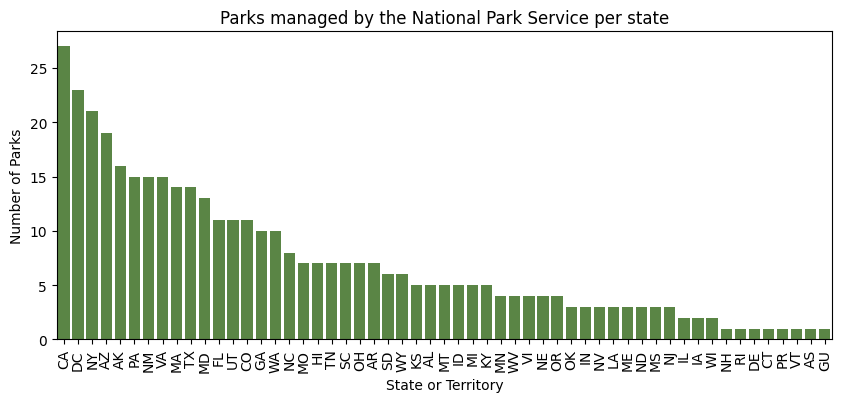

In [20]:
unique_parks = data.groupby('state_2')['ParkName'].nunique().reset_index().sort_values('ParkName',ascending=False)

fig = sns.barplot(data=unique_parks,x='state_2',y='ParkName')
plt.xticks(rotation=90)
plt.ylabel('Number of Parks')
plt.xlabel('State or Territory')
plt.rcParams["figure.figsize"] = (10,4)
_=plt.title('Parks managed by the National Park Service per state')

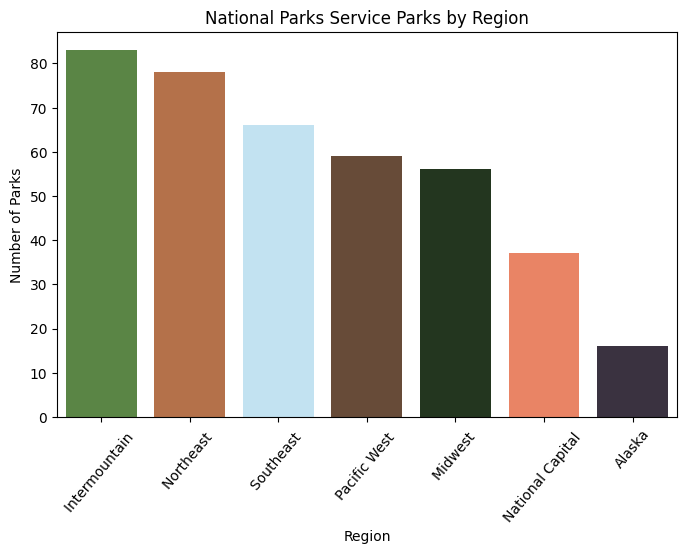

In [44]:
unique_parks = data.groupby('Region')['ParkName'].nunique().reset_index().sort_values('ParkName',ascending=False)

fig = sns.barplot(data=unique_parks,x='Region',y='ParkName',hue='Region',palette=['#56903A','#C56C39','#BAE5F9','#6F4930','#213A1B','#FF784F','#3A3042'])
plt.xticks(rotation=50)
plt.ylabel('Number of Parks')
plt.xlabel('Region')
plt.rcParams["figure.figsize"] = (8,5)
_=plt.title('National Parks Service Parks by Region')

In [15]:
data['ParkName'].nunique()

395

In [16]:
data['ParkType'].unique()

array(['National Historical Park', 'National Park', 'National Monument',
       'National Wild & Scenic River', 'National Historic Site',
       'National Recreation Area', 'National Battlefield',
       'National Lakeshore', 'National Memorial', 'National Seashore',
       'National Preserve', 'National River', 'National Parkway',
       'Park (Other)', 'National Military Park', 'National Reserve',
       'National Battlefield Park', 'International Historic Site'],
      dtype=object)

In [17]:
data.columns

Index(['ParkName', 'UnitCode', 'ParkType', 'Region', 'State', 'Year', 'Month',
       'RecreationVisits', 'NonRecreationVisits', 'RecreationHours',
       'NonRecreationHours', 'ConcessionerLodging', 'ConcessionerCamping',
       'TentCampers', 'RVCampers', 'Backcountry',
       'NonRecreationOvernightStays', 'MiscellaneousOvernightStays',
       'ParkNameTotal', 'UnitCodeTotal', 'ParkTypeTotal', 'RegionTotal',
       'StateTotal', 'YearTotal', 'RecreationVisitsTotal',
       'NonRecreationVisitsTotal', 'RecreationHoursTotal',
       'NonRecreationHoursTotal', 'ConcessionerLodgingTotal',
       'ConcessionerCampingTotal', 'TentCampersTotal', 'RVCampersTotal',
       'BackcountryTotal', 'NonRecreationOvernightStaysTotal',
       'MiscellaneousOvernightStaysTotal', 'day', 'date', 'state_2'],
      dtype='object')

In [18]:
p = data.copy()
p.drop(columns=['State','ParkNameTotal', 'UnitCodeTotal', 'ParkTypeTotal', 'RegionTotal',
       'StateTotal', 'YearTotal', 'RecreationVisitsTotal',
       'NonRecreationVisitsTotal', 'RecreationHoursTotal',
       'NonRecreationHoursTotal', 'ConcessionerLodgingTotal',
       'ConcessionerCampingTotal', 'TentCampersTotal', 'RVCampersTotal',
       'BackcountryTotal', 'NonRecreationOvernightStaysTotal', 'Year', 'Month', 'day',
       'MiscellaneousOvernightStaysTotal'],inplace=True)
easy_access_df=p.melt(id_vars=['ParkName', 'UnitCode', 'ParkType', 'Region','state_2','date'],
       var_name='visit_type',
       value_name='number_of_visits')
easy_access_df.head()

,ParkName,UnitCode,ParkType,Region,state_2,date,visit_type,number_of_visits
0,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-01-31,RecreationVisits,5537
1,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-02-28,RecreationVisits,6064
2,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-03-31,RecreationVisits,12005
3,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-04-30,RecreationVisits,20202
4,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-05-31,RecreationVisits,23537


In [19]:
easy_access_df.to_csv('timeseries_data.csv')
easy_access_df.head()

,ParkName,UnitCode,ParkType,Region,state_2,date,visit_type,number_of_visits
0,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-01-31,RecreationVisits,5537
1,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-02-28,RecreationVisits,6064
2,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-03-31,RecreationVisits,12005
3,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-04-30,RecreationVisits,20202
4,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2003-05-31,RecreationVisits,23537
